In [108]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn

In [109]:
S_calculated = np.zeros((13,16))
add_1_row = [0, 0, 0, 0, 
             1, 1, 
             2, 2, 2, 2, 2 ,2,
             3, 3, 3, 3,
             4, 4,
             5, 5, 5, 
             6, 6,
             7, 7, 7, 7, 
             8, 9, 10, 11, 12]
add_1_col = [0, 1, 2, 15, 
             1, 3, 
             2, 2, 3, 4, 10 ,14,
             4, 5, 6, 13,
             6, 7,
             7, 8, 10, 
             8, 9,
             6, 9, 10, 12, 
             11, 12, 13, 14, 15]
for i,j in zip(add_1_row, add_1_col):
    if (i,j) in neg_1:
        S_calculated[i,j] -= 1
    else :
        S_calculated[i,j] += 1
neg_1 = {(0,0), (1,1), (2,2), (2,3), (3,3), 
         (3,4), (4,6), (5,7), (6,8), (7,9), (7,10), (8,11),
         (9,12), (10,13), (11,14), (12,15)}
S_measured = np.zeros((13,1))
S_measured[8:,] = np.reshape([1.078, 1.786, 2.928, 2.833, 0.205], (5,1))
S = np.concatenate((S_calculated,S_measured), axis = 1)

In [110]:
lb = np.zeros(13)
lb[0], lb[5] = [11, 6.4]
ub = np.array([20]*13)
ub[0], ub[6] = [11, 6.4]

In [125]:
def guess_sol(sample = 100):
    v_guess = np.zeros((17,sample))
    for i in range(sample):
        v_guess[0,i] = 11
        for j in range(1,17):
            if j == 5:
                v_guess[j, i] = np.random.uniform(low = 6.4, high = 20)
            elif j == 6:
                v_guess[j, i] = np.random.uniform(low = 0, high = 6.4) 
            else :
                v_guess[j, i] = np.random.uniform(low = 0, high = 20)
    return v_guess

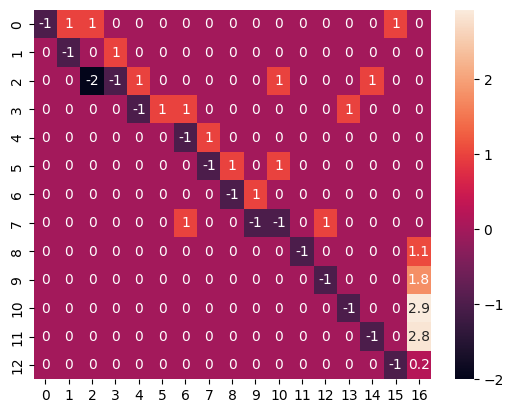

In [112]:
seaborn.heatmap(S, annot= True)
plt.show()

In [117]:
v_guess.shape

(17, 100)

In [126]:
v_guess = guess_sol(sample = 10000)
S.dot(v_guess)

array([[  4.09216392,  25.17501634,  10.48475983, ...,  16.41424144,
         17.64793248,  23.11890862],
       [ -4.318408  , -10.86341598,  -1.98881174, ..., -12.93027542,
          4.07912484,   2.80325532],
       [ -7.81160663,  -2.47301265,  29.06878495, ...,  16.80888048,
        -12.02891296, -15.32474919],
       ...,
       [ 32.32424399,  33.61524257,  -9.62066396, ...,  28.57921963,
         -0.12888588,  -4.70381908],
       [ 41.82930071,  38.9325613 ,  -6.79526848, ...,  31.21016703,
         11.90420982,   0.17674306],
       [  3.08663429,  -4.47546899, -12.33683229, ...,  -4.20691501,
         -6.56813263,  -8.77590326]])

In [ ]:
U, S_eig, Vh = np.linalg.svd(S)

In [ ]:
S_eig

array([4.69556835, 3.09474033, 2.33328824, 2.08381861, 1.97279553,
       1.83505502, 1.34588207, 1.18749316, 1.        , 0.9775544 ,
       0.83616489, 0.65123787, 0.14450398])